<a href="https://colab.research.google.com/github/shash365/iitkgp-aiml/blob/main/2024_03_22_SupervisedModels_NaiveBayes_KNN_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [4]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

In [5]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Before applying a model lets first get data into train and test. Then standardize the data for fast calculation.

In [21]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [23]:
# Split the data into train and test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )

In [27]:
# Now standardize the values .. we will do data Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [29]:
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

# Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(X_train, y_train)

GaussianNB()

In [32]:
# lets predict train values
y_pred = classifierNB.predict(X_train)

In [34]:
# Finding accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score

In [36]:
acc_score_train = accuracy_score(y_train, y_pred)
print(f'Accuracy for training data: {acc_score_train}')

Accuracy for training data: 0.9428571428571428


In [37]:
# Calculate accuracy score for test data
y_pred = classifierNB.predict(X_test)

In [38]:
acc_score_test = accuracy_score(y_test, y_pred)
print(f'Accuracy for test data: {acc_score_test}')

Accuracy for test data: 0.9777777777777777


In [40]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]])

In [42]:
# Classification report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45



In [43]:
# Accuracy for training and testing data is 94.3 and 97.78 resp.

# Support vector Machine (SVM)

In [46]:
# Support Vector Clssifier
from sklearn.svm import SVC

In [50]:
acc_score_list = []
krnls = ['linear','poly','rbf','sigmoid']

In [51]:
for i in krnls:
  clf = SVC(kernel=i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  acc_score_train = accuracy_score(y_train, y_pred)
  acc_score_list.append(acc_score_train)
print(f'Accuracy list : {acc_score_list}')

Accuracy list : [0.9714285714285714, 0.9047619047619048, 0.9619047619047619, 0.8952380952380953]


In [53]:
print(f'Accuracy for kernel - linear  : {acc_score_list[0]}')
print(f'Accuracy for kernel - poly    : {acc_score_list[1]}')
print(f'Accuracy for kernel - rbf     : {acc_score_list[2]}')
print(f'Accuracy for kernel - sigmoid : {acc_score_list[3]}')

Accuracy for kernel - linear  : 0.9714285714285714
Accuracy for kernel - poly    : 0.9047619047619048
Accuracy for kernel - rbf     : 0.9619047619047619
Accuracy for kernel - sigmoid : 0.8952380952380953


In [54]:
accuracies = {
    'Linear' : acc_score_list[0],
    'Polynomial' : acc_score_list[1],
    'RBF' : acc_score_list[2],
    'Sigmoid' : acc_score_list[3]
}

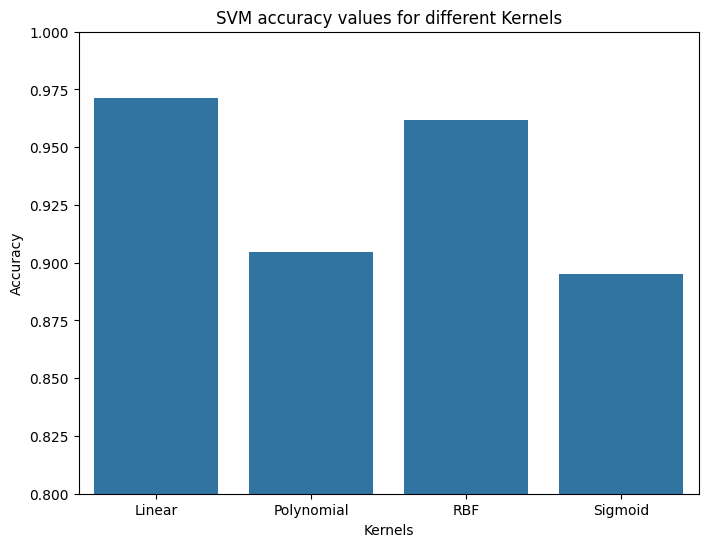

In [56]:
# Lets plot these on barplot
plt.figure(figsize=(8,6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('SVM accuracy values for different Kernels')
plt.xlabel('Kernels')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()

In [60]:
# Now predict accuracy for TEST data
krnls = ['linear','poly','rbf','sigmoid']
acc_score_test = []
for i in krnls:
  clf = SVC(kernel=i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accur_score = accuracy_score(y_test, y_pred)
  acc_score_test.append(accur_score)
print(f'Accuracy score for TEST data : {acc_score_test}')

Accuracy score for TEST data : [0.9777777777777777, 0.9555555555555556, 1.0, 0.8888888888888888]


In [61]:
print(f'Accuracy for kernel - linear  : {acc_score_test[0]}')
print(f'Accuracy for kernel - poly    : {acc_score_test[1]}')
print(f'Accuracy for kernel - rbf     : {acc_score_test[2]}')
print(f'Accuracy for kernel - sigmoid : {acc_score_test[3]}')

Accuracy for kernel - linear  : 0.9777777777777777
Accuracy for kernel - poly    : 0.9555555555555556
Accuracy for kernel - rbf     : 1.0
Accuracy for kernel - sigmoid : 0.8888888888888888


In [63]:
accuracies_test = {
    'Linear' : acc_score_test[0],
    'Polynomial' : acc_score_test[1],
    'RBF' : acc_score_test[2],
    'Sigmoid' : acc_score_test[3]
}

In [62]:
# Lets put these accuracies values on barplot

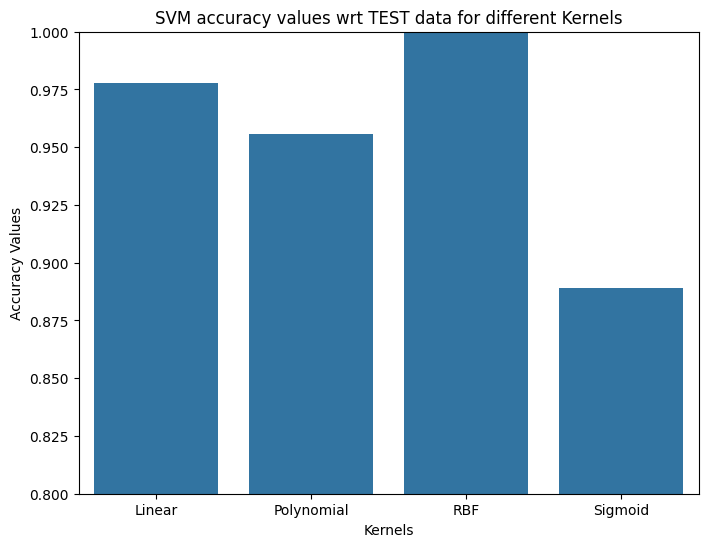

In [64]:
plt.figure(figsize=(8,6))
sns.barplot(x=list(accuracies_test.keys()), y=list(accuracies_test.values()))
plt.title('SVM accuracy values wrt TEST data for different Kernels')
plt.xlabel('Kernels')
plt.ylabel('Accuracy Values')
plt.ylim(0.8,1.0)
plt.show()

In [65]:
# lets check confusion_matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[19  0  0]
 [ 0  9  4]
 [ 0  1 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.90      0.69      0.78        13
 Iris-virginica       0.75      0.92      0.83        13

       accuracy                           0.89        45
      macro avg       0.88      0.87      0.87        45
   weighted avg       0.90      0.89      0.89        45



# KNN (Nearest Neighbors Classifier)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [67]:
y_pred = classifier.predict(X_train)
acc_sc_tr_knn = accuracy_score(y_train, y_pred)
print(f'Accuracy KNN for Train data : {acc_sc_tr_knn}')

Accuracy KNN for Train data : 0.9428571428571428


In [70]:
# Lets predict accuracy score for different values of neighbors
acc_score_list = []
for i in range(5,15):
  clf_knn = KNeighborsClassifier(n_neighbors=i)
  clf_knn.fit(X_train, y_train)
  y_pred = clf_knn.predict(X_train)
  acc_scr = accuracy_score(y_train, y_pred)
  acc_score_list.append(acc_scr)
print(f'Accuracy score for KNN neigbors in range(5,15) : {acc_score_list}')

Accuracy score for KNN neigbors in range(5,15) : [0.9523809523809523, 0.9523809523809523, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9333333333333333, 0.9333333333333333, 0.9428571428571428, 0.9333333333333333, 0.9333333333333333]


In [71]:
# Now predict the accuracy score for TEST data

In [72]:
# Lets predict accuracy score for different values of neighbors
acc_score_list = []
for i in range(5,15):
  clf_knn = KNeighborsClassifier(n_neighbors=i)
  clf_knn.fit(X_train, y_train)
  y_pred = clf_knn.predict(X_test)
  acc_scr = accuracy_score(y_test, y_pred)
  acc_score_list.append(acc_scr)
print(f'Accuracy score for KNN neigbors in range(5,15) : {acc_score_list}')

Accuracy score for KNN neigbors in range(5,15) : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


###

Accuracies for KNN is 1.0 i.e. 100%, it seems it is best among these classifiers i.e. Naive Bayes, SVM and KNN.